<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions.

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
marvel = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv")
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## Q1. How big is this dataset?
Use pandas to find out the number of rows and columns.

In [ ]:
print("Number of rows and columns:")
marvel.shape

Number of rows and columns:


(16376, 13)

## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

In [ ]:
marvel.name.nunique()

16376

In [ ]:
marvel.EYE.unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

In [ ]:
# g=sns.catplot(
#     data=marvel,
#     x="APPEARANCES",
#     y="name",
#     kind="strip",
#     aspect=1, # aspect ratio
#     hue="ALIGN",
#     # row="Legendary",
#     palette="Paired",
#     jitter=0.3,
#     height=10
#     )
# g.fig.suptitle("Attack of Type 1 Pokemon in 6 Generations", y=1.02);

## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

In [ ]:
sorted_marvel = marvel.sort_values(by="APPEARANCES", ascending=False)

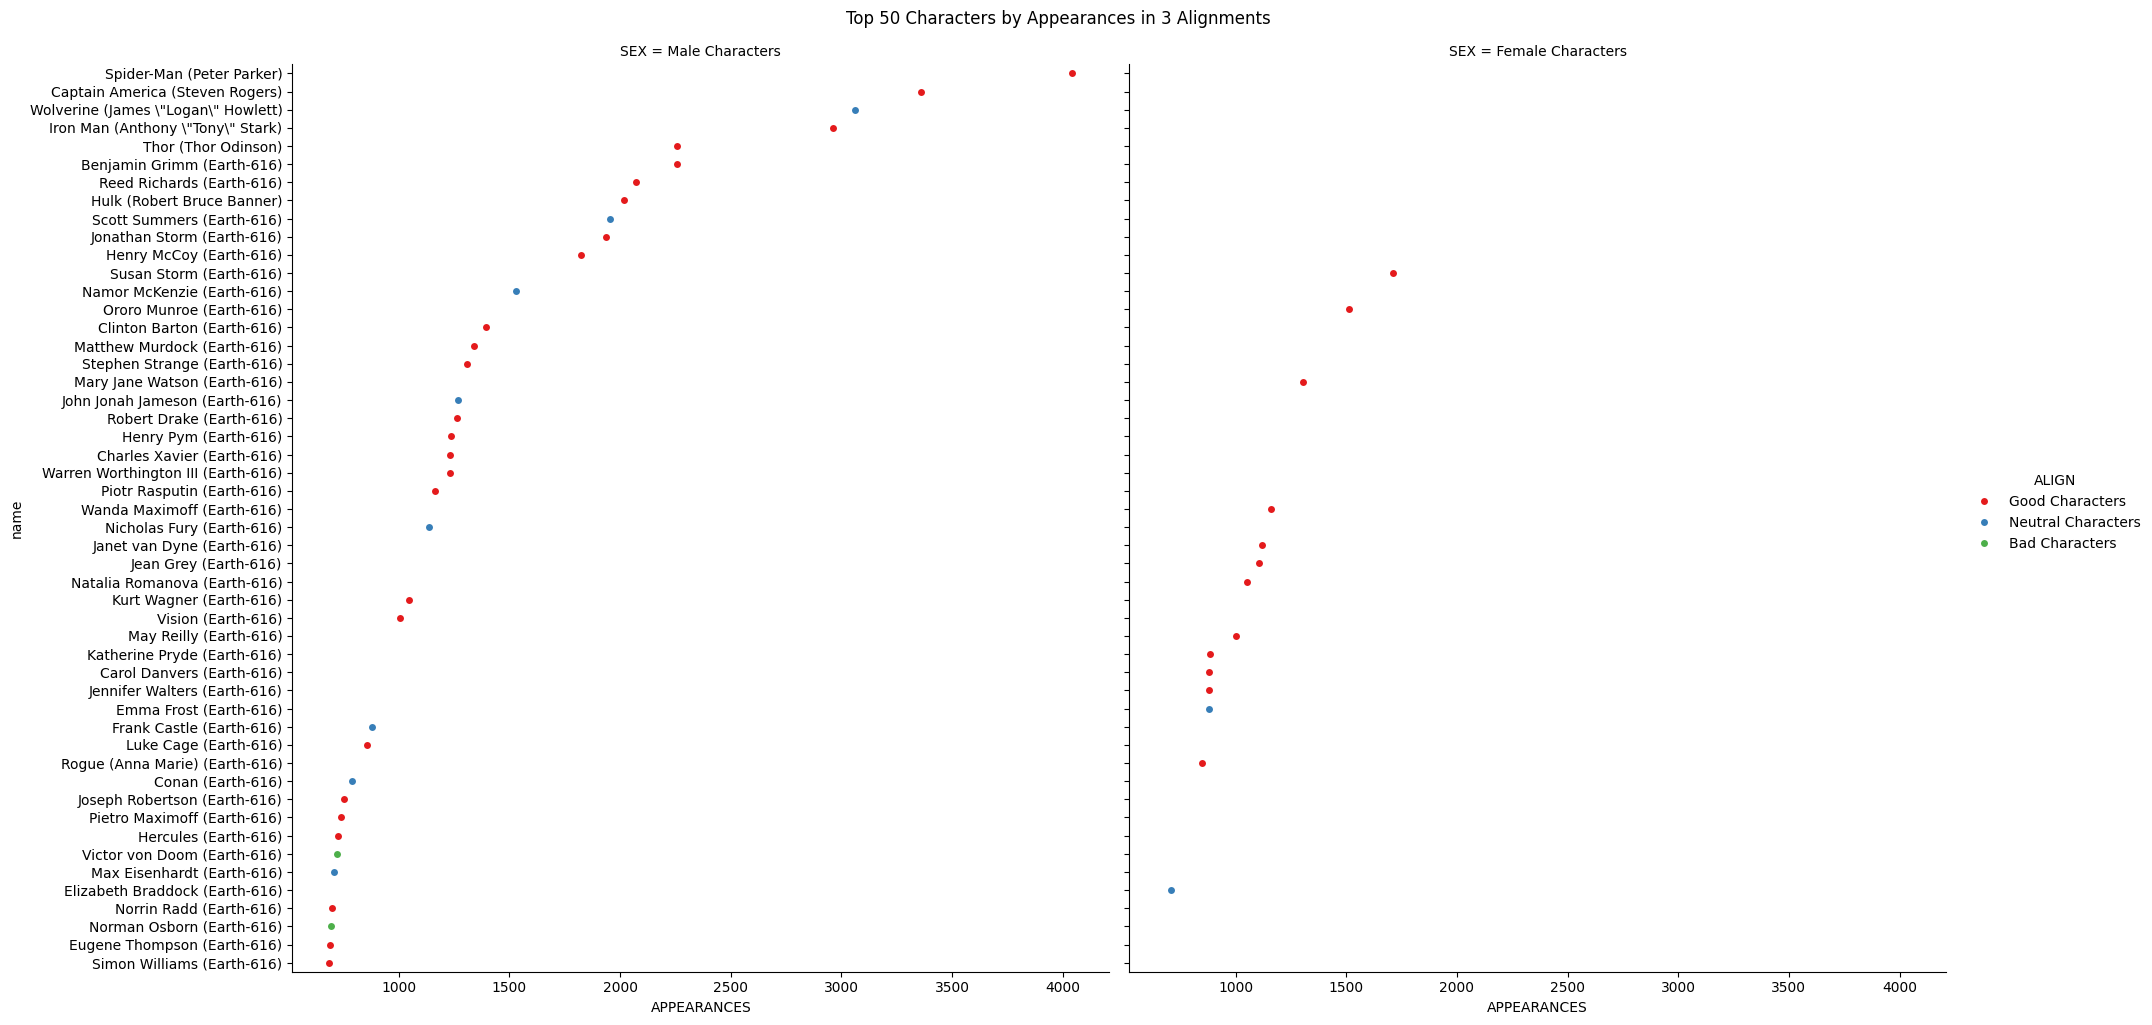

In [ ]:
g=sns.catplot(
    data=sorted_marvel.head(50),
    x="APPEARANCES",
    y="name",
    aspect=1, # aspect ratio
    hue="ALIGN",
    col="SEX",
    palette="Set1",
    jitter=0.3,
    height=10
    )
g.fig.suptitle("Top 50 Characters by Appearances in 3 Alignments", y=1.02);

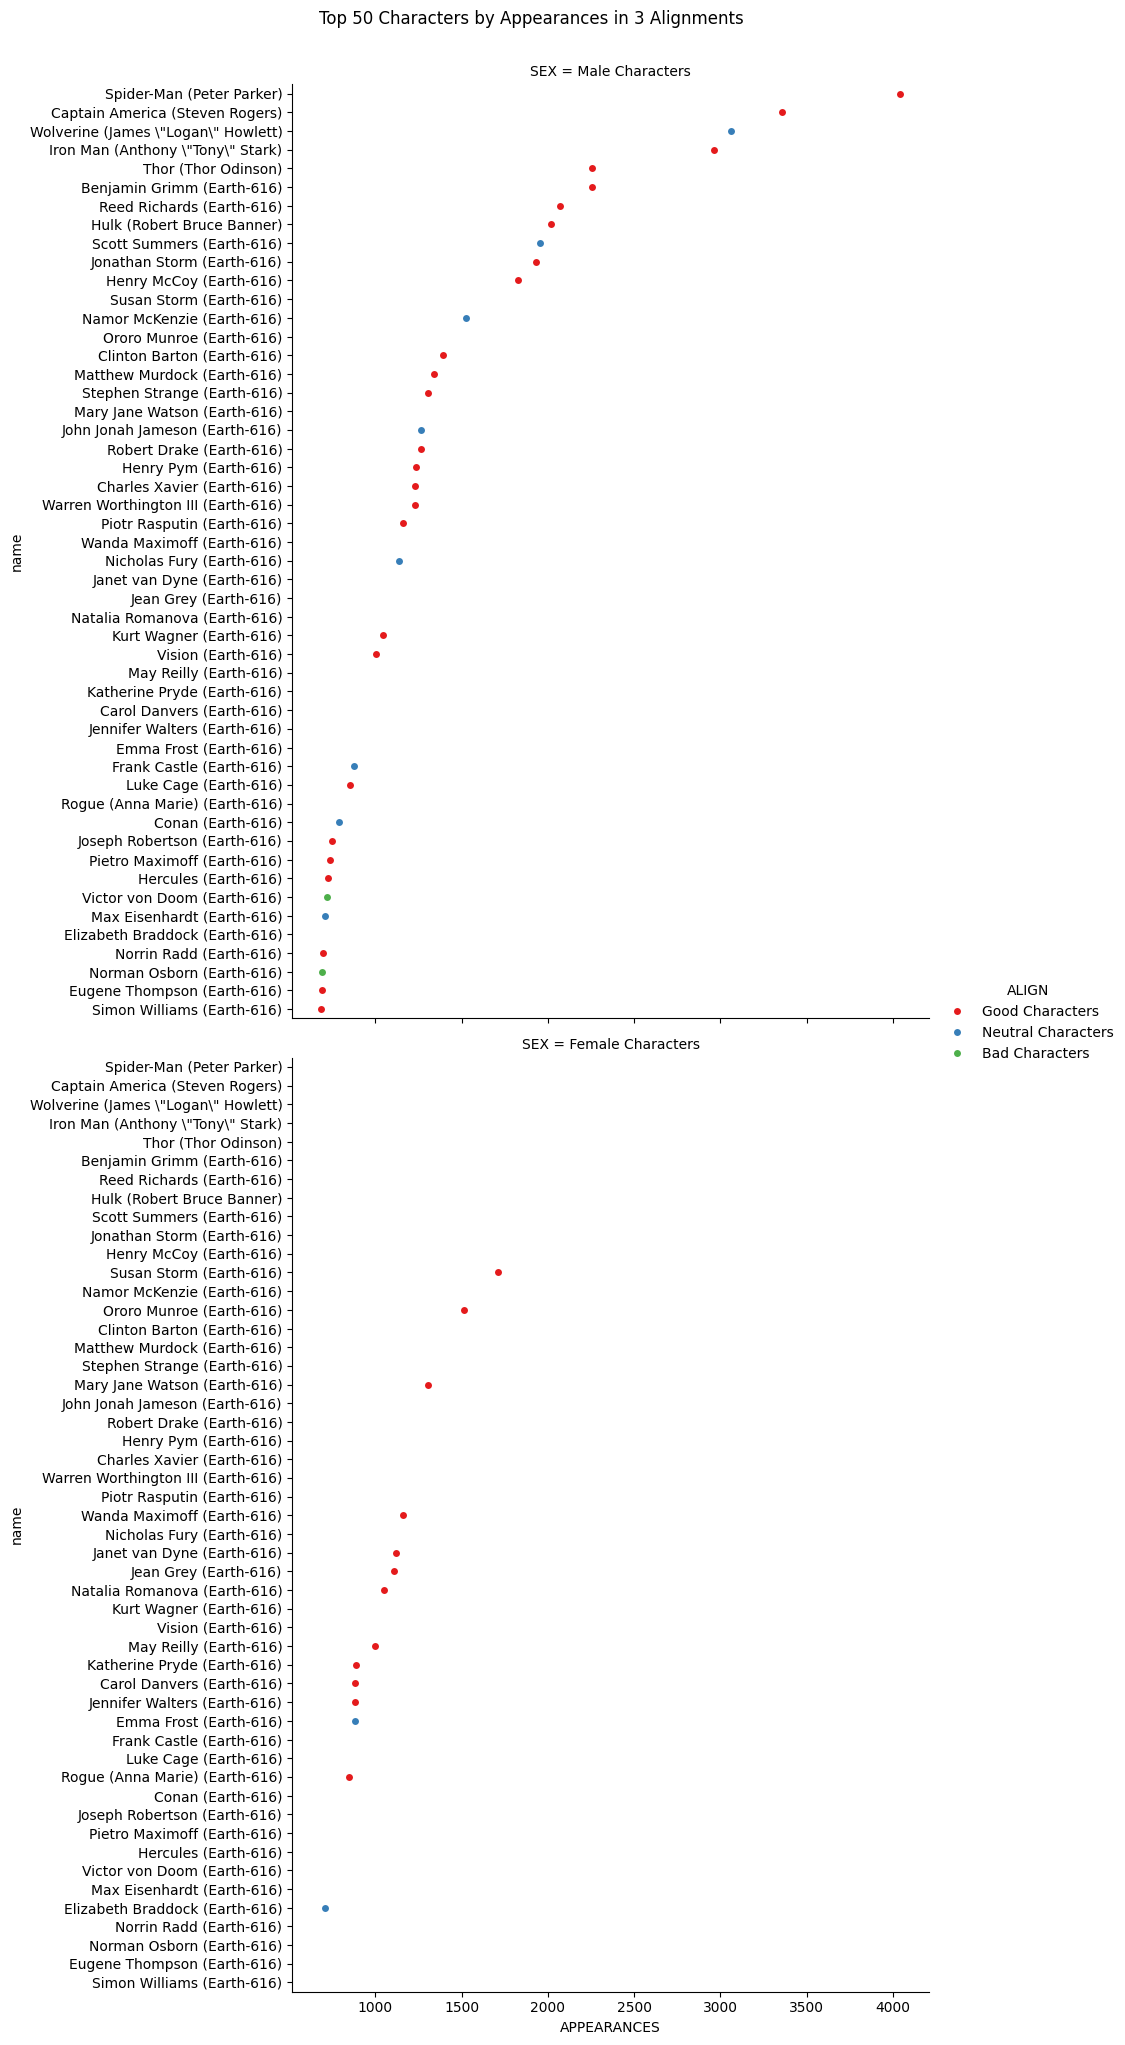

In [ ]:
g=sns.catplot(
    data=sorted_marvel.head(50),
    x="APPEARANCES",
    y="name",
    aspect=1, # aspect ratio
    hue="ALIGN",
    row="SEX",
    palette="Set1",
    jitter=0.3,
    height=10
    )
g.fig.suptitle("Top 50 Characters by Appearances in 3 Alignments", y=1.02);

Question:

How does the number of appearances in the top 50 differ between male and female characters with different alignments (Good, Bad, Neutral)?

Answer:

Based on the strip plot, we can observe the distribution of the top 50 appearances for male and female characters across different alignments:
- Male characters have a larger number of characters with high appearances, particularly those aligned as 'Good'.
- Female characters have a slightly lower overall number of appearances.
- Both male and female characters with 'Good' alignment seem to have more appearances.

Conclusion:

This demonstrates that characters with 'Good' alignment tend to appear more, no matter what gender.

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

In [ ]:
# filter = marvel[marvel['SEX'] != 'Genderfluid Characters']

# g=sns.catplot(
#     data=filter,
#     x="Year",
#     y="ALIGN",
#     aspect=2,
#     kind="box",
#     height=8,
#     hue="SEX",
#     palette='Set2',
#     )

# alignment_counts = filter['ALIGN'].value_counts()

# plt.text(0.5, -0.2, '\n'.join(f"{alignment}: {count}" for alignment, count in alignment_counts.items()),
#          ha="center", fontsize=10, transform=plt.gca().transAxes)

# plt.title("Distribution of Good, Neutral and Bad characters between different years");

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

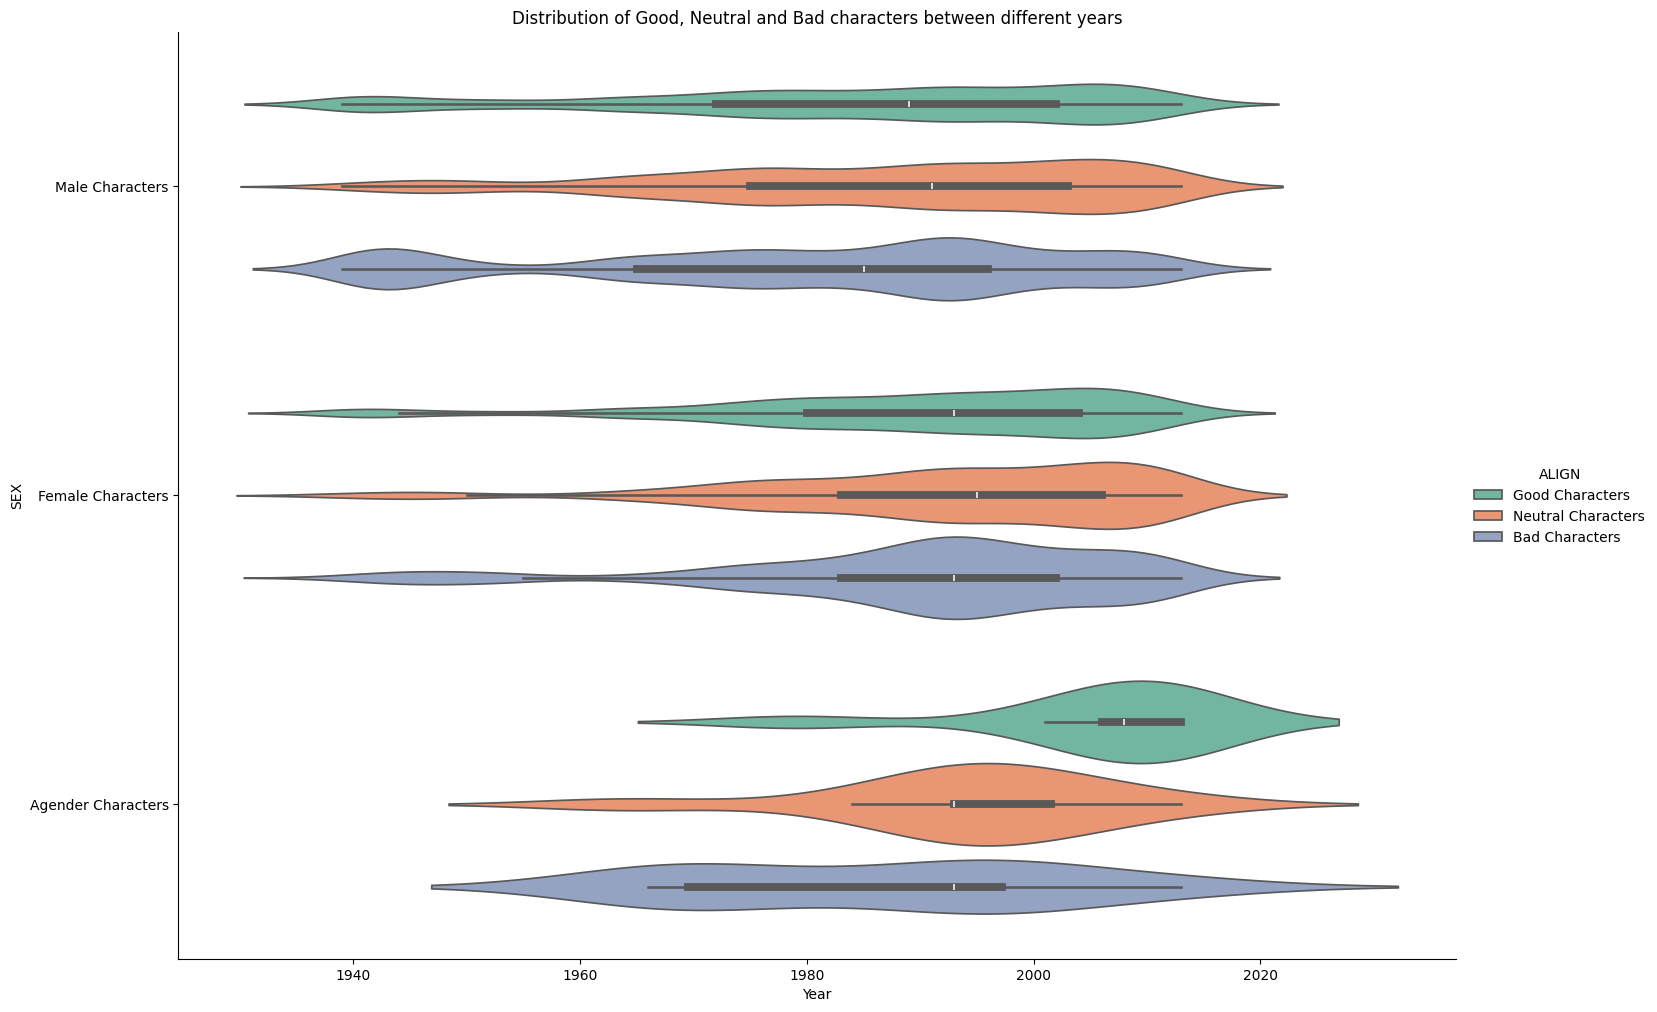

In [ ]:
filter = marvel[marvel['SEX'] != 'Genderfluid Characters']

g=sns.catplot(
    data=filter,
    y="SEX",
    x="Year",
    aspect=1.5,
    kind="violin",
    height=10,
    hue="ALIGN",
    palette="Set2",
    )

plt.title("Distribution of Marvel Characters by Sex and Alignment Over Time");


## Bonus:
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories.